In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pathlib
import itertools

# Lendo arquivos de entrada

In [2]:
small_graphs_feats_path = pathlib.Path('./data/small_graphs_new_feats_merge.csv')
big_graphs_feats_path = pathlib.Path('./data/big_graphs_new_feats_merge.csv')

In [3]:
small_df = pd.read_csv(small_graphs_feats_path)
big_df = pd.read_csv(big_graphs_feats_path)

In [4]:
small_df.head()

,city_name,city_id,streets_per_node_avg,node_density_km,intersection_density_km,edge_density_km,street_density_km,1way_int_count,2way_int_count,3way_int_count,...,19way_int_prop,20way_int_prop,21way_int_prop,22way_int_prop,23way_int_prop,24way_int_prop,25way_int_prop,26way_int_prop,27way_int_prop,28way_int_prop
0,6th of october,3881,3.074547,134.838226,129.955905,29758.680898,22894.690589,136,5,3061,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9th,4032,3.123626,50.469652,49.637735,21212.274383,19026.130382,6,1,299,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,aachen,2245,2.656357,99.808709,78.028727,30088.459591,17058.828775,896,89,2670,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,aalborg,2486,2.547955,143.889085,101.025472,33429.217757,19072.796647,1202,31,2240,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,aarhus,2518,2.620561,141.914403,104.059823,33875.790251,19395.066465,1645,57,3536,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
big_df.head()

,city_name,city_id,streets_per_node_avg,node_density_km,intersection_density_km,edge_density_km,street_density_km,1way_int_count,2way_int_count,3way_int_count,...,19way_int_prop,20way_int_prop,21way_int_prop,22way_int_prop,23way_int_prop,24way_int_prop,25way_int_prop,26way_int_prop,27way_int_prop,28way_int_prop
0,abidjan,1675,2.936697,141.555173,123.793646,39548.647408,20733.230905,4101,16,22448,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,abuja,2565,2.649295,151.633890,118.899379,45221.290085,25807.838050,4424,28,14359,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,accra,1910,2.793080,135.717346,115.739419,41304.476603,21356.772946,9887,16,51417,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,adana,4237,2.992730,353.406591,326.299573,70754.534021,38895.877178,1762,13,17887,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,addis ababa,5134,2.873387,557.255876,483.777424,113221.691294,61017.049078,7744,17,42926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Juntando com os indicadores originais

In [6]:
indicators_path = pathlib.Path('./data/indicators.csv')
indicators_df = pd.read_csv(indicators_path)

In [7]:
indicators_df.head()

,country,country_iso,core_city,uc_id,cc_avg_dir,cc_avg_undir,cc_wt_avg_dir,cc_wt_avg_undir,circuity,elev_iqr,...,prop_3way,prop_deadend,self_loop_proportion,straightness,uc_names,world_region,world_subregion,resident_pop,area,built_up_area
0,indonesia,IDN,wates,12375,0.036690,0.038630,0.004276,0.004359,1.065403,11.0,...,0.743653,0.171990,0.000619,0.938612,Wates,Asia,South-Eastern Asia,107046,28.0,4.717896
1,brazil,BRA,taquaralto,1186,0.024520,0.035016,0.001195,0.001439,1.008276,18.0,...,0.589312,0.043543,0.000000,0.991791,Taquaralto,Latin America and the Caribbean,South America,90077,20.0,9.620359
2,china,CHN,xinqiao,12218,0.036481,0.045724,0.001608,0.001723,1.016544,2.0,...,0.486911,0.125654,0.000000,0.983725,Xinqiao; Jiepai; Baqiao; Houxiang,Asia,Eastern Asia,104714,42.0,22.057976
3,colombia,COL,yopal,687,0.016110,0.019414,0.001072,0.001221,1.011106,16.0,...,0.583149,0.056171,0.000460,0.989016,Yopal,Latin America and the Caribbean,South America,167421,16.0,5.645732
4,czech_republic,CZE,pilsen,2886,0.032913,0.044298,0.001418,0.001758,1.047311,24.0,...,0.536906,0.250421,0.001013,0.954826,Pilsen,Europe,Eastern Europe,142248,53.0,28.124355


In [8]:
len(indicators_df)

8914

In [9]:
new_features_computed_df = pd.concat([small_df, big_df])

In [10]:
len(new_features_computed_df)

8909

In [11]:
new_features_computed_df = pd.concat([small_df, big_df])
final_df = indicators_df.merge(new_features_computed_df, left_on='uc_id', right_on='city_id')
final_df.drop('city_id', axis=1, inplace=True)
final_df.drop('city_name', axis=1, inplace=True)
unwanted_cities = [154, 11862, 12858, 12914, 12964]
final_df.query('uc_id not in @unwanted_cities', inplace=True)

## Criando novas colunas a partir das colunas atuais

In [12]:
final_df['pop_density'] = final_df['resident_pop']/final_df['built_up_area']
final_df['prop_used_area'] = final_df['built_up_area']/final_df['area']

In [2]:
final_features_path = pathlib.Path('./data/final_df.csv')
final_df = pd.read_csv(final_features_path)

In [13]:
final_features_path = pathlib.Path('./data/final_df.csv')
final_df.to_csv(final_features_path, index=False)

In [14]:
final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
uc_id,8909.0,6324.679313,4194.096817,1.000000,2415.000000,5972.000000,10625.000000,13135.000000
cc_avg_dir,8909.0,0.033340,0.017072,0.000000,0.023122,0.031073,0.040710,0.333333
cc_avg_undir,8909.0,0.040122,0.021088,0.000000,0.026610,0.036272,0.049863,0.333333
cc_wt_avg_dir,8909.0,0.002086,0.003578,0.000000,0.000855,0.001429,0.002341,0.166229
cc_wt_avg_undir,8909.0,0.002267,0.003630,0.000000,0.000966,0.001609,0.002563,0.166229
...,...,...,...,...,...,...,...,...
26way_int_prop,20.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
27way_int_prop,20.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
28way_int_prop,20.0,0.000002,0.000009,0.000000,0.000000,0.000000,0.000000,0.000041
pop_density,8909.0,26217.344204,35022.223704,973.885228,7736.089942,14789.426464,30984.737194,642691.966972


In [15]:
len(final_df)

8909

Estão faltando exatamente as cinco cidades que não foram processadas por restrições de memória. Essas cidades podem ser vistas no notebook *analiseIndicadores*.

In [16]:
unwanted_cols = [
        '7way_int_count', '8way_int_count', '9way_int_count', '7way_int_prop',
       '8way_int_prop', '9way_int_prop', '10way_int_count', '10way_int_prop',
       '11way_int_count', '11way_int_prop', '12way_int_count',
       '13way_int_count', '14way_int_count', '15way_int_count',
       '16way_int_count', '17way_int_count', '18way_int_count',
       '19way_int_count', '20way_int_count', '21way_int_count',
       '22way_int_count', '23way_int_count', '24way_int_count',
       '25way_int_count', '26way_int_count', '27way_int_count',
       '28way_int_count', '12way_int_prop', '13way_int_prop', '14way_int_prop',
       '15way_int_prop', '16way_int_prop', '17way_int_prop', '18way_int_prop',
       '19way_int_prop', '20way_int_prop', '21way_int_prop', '22way_int_prop',
       '23way_int_prop', '24way_int_prop', '25way_int_prop', '26way_int_prop',
       '27way_int_prop', '28way_int_prop', '5way_int_prop', '6way_int_prop',
        '1way_int_count', '2way_int_count', '3way_int_count', '4way_int_count',
        '5way_int_count', '6way_int_count', '2way_int_prop']
final_df.drop(unwanted_cols, axis=1, inplace=True)

## Criando novas colunas momentâneas

In [3]:
final_df['big'] = final_df['node_count'] > 20_000
final_df['organic'] = final_df['organic_prop'] > 0.5

In [18]:
final_df['big'].value_counts()

False    8605
True      304
Name: big, dtype: int64

In [19]:
final_df['organic'].value_counts()

True     8725
False     184
Name: organic, dtype: int64

In [20]:
set(final_df[final_df['organic'] == False]['uc_id'].tolist()).intersection(final_df[final_df['big'] == True]['uc_id'].tolist())

{1105}

Apenas uma das cidades não consideradas orgânicas é uma cidade com mais de 20 mil nós.

In [21]:
final_df[final_df['uc_id'] == 1105][['core_city', 'uc_id', 'node_count', 'organic_prop']]

,core_city,uc_id,node_count,organic_prop
8596,buenos_aires,1105,162623,0.462825


## Correlações entre variáveis

In [22]:
final_df.columns

Index(['country', 'country_iso', 'core_city', 'uc_id', 'cc_avg_dir',
       'cc_avg_undir', 'cc_wt_avg_dir', 'cc_wt_avg_undir', 'circuity',
       'elev_iqr', 'elev_mean', 'elev_median', 'elev_range', 'elev_std',
       'grade_mean', 'grade_median', 'intersect_count',
       'intersect_count_clean', 'intersect_count_clean_topo', 'k_avg',
       'length_mean', 'length_median', 'length_total', 'street_segment_count',
       'node_count', 'orientation_entropy', 'orientation_order',
       'pagerank_max', 'prop_4way', 'prop_3way', 'prop_deadend',
       'self_loop_proportion', 'straightness', 'uc_names', 'world_region',
       'world_subregion', 'resident_pop', 'area', 'built_up_area',
       'streets_per_node_avg', 'node_density_km', 'intersection_density_km',
       'edge_density_km', 'street_density_km', 'nodes_per_km_street',
       'organic_prop', 'meshedness_coefficient', 'pop_density',
       'prop_used_area', 'big', 'organic'],
      dtype='object')

In [23]:
len(final_df.columns)

51

In [24]:
def plot_corr(data:pd.DataFrame, cols_to_drop:list):
    corr = data.drop(cols_to_drop, axis=1).corr(numeric_only=True)

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [25]:
to_drop = ['uc_id', 'elev_iqr', 'elev_median',
           'elev_range', 'elev_std', 'grade_mean', 'grade_median']

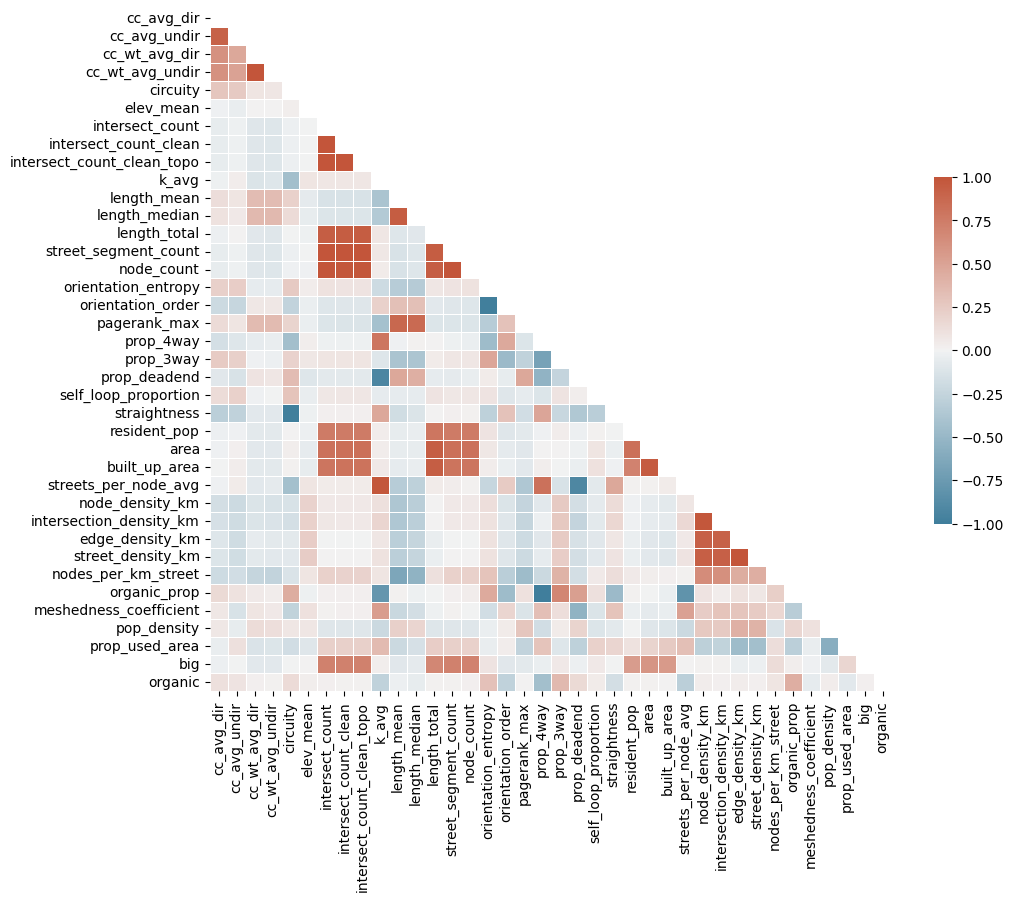

In [26]:
plot_corr(final_df, to_drop)

<h3>Correlações já esperadas</h3>

- **Coeficientes de clustering**: As variáveis de coeficiente de clustering (as que começam com *cc*), que indicam quanto os vizinhos de um nó/intersecção estão conectados entre si, possuem alta correlação umas com as outras. Entretanto, elas não possuem correlação com variáveis de densidade de intersecção ou nós. Isso indica que, apesar de existirem cidades mais densas, com intersecções mais próximas umas das outras, essas intersecções não estão, necessariamente, conectadas umas às outras. 

- **Circuito**: A variável que indica quão parecido com uma linha reta é o caminho entre dois nós (*circuity*) possui alta correlação negativa com a sua inversa *straightness*.

- **Contagem de intersecções**: As variáveis de contagem de intersercções (as que começam com *intersect_count*) possuem alta correlação umas com as outras. Além disso, também possuem alta correlação com: contagem de nós (*node_count*), já que nós são intersecções mais aqueles que representam ruas sem saída; contagem de segmentos de ruas (*street_segment_count*), já que, para cada intersecção, existe, pelo menos, duas arestas representando dois segmentos de ruas; comprimento total das ruas (*length_total*), já que, com mais segmentos de ruas, tem-se maior comprimento total da malha de ruas; população residente (*resident_pop*), já que mais intersecções representam mais ruas e, consequentemente, cidades maiores que abrigam mais pessoas; área (*area*) e área total construída (*build_up_area*), já que, com mais área construída, o que precisa de mais área total para a cidade, é possível ter mais construções que necessitam de ruas aumentando, consequentemente, a quantidade de intersecções; cidade grande (*big*), já que, foram consideradas cidades grandes aquelas com mais de 20 mil nós

- **grau médio**: A variável indicando o grau médio dos nós (*k_avg*) possui alta correlação positiva com: quantidade de ruas média por nó (*streets_per_node_avg*), já que, quanto maior a média de ruas por nó, maior a média do grau; proporção de intersecções de 4 vias (*prop_4way*), já que, quanto maior essa proporção, mais nós se conectam a 4 outros nós, o que aumenta o grau médio. Além disso, possui alta correlação negativa com: proporção orgânica (*organic_prop*), já que, quanto maior esse valor, mais os nós tendem a ter conexões com 1 ou 3 outros nós, o que diminui o grau médio; proporção de ruas sem saída (*prop_deadend*), já que, quanto mais ruas sem saída, significa que os nós se conectam a apenas um outro nó, diminuindo o grau médio;

- **Comprimento total**: A variável indicando o comprimento total das ruas da rede (*length_total*), possui alta correlação com: área (*area*) e área total construída (*build_up_area*), já que, quanto maior a área disponível e construída, mais ruas são necessárias; população residente (*resident_pop*), já que, quanto mais pessoas, mais ruas são necessárias para as construções que devem abrigá-las;

- **Contagem de segmentos de ruas** e **quantidade de nós**: A variável indicando a quantidade de segmentos de ruas ou arestas (*street_segment_count*) e a que indica a quantidade total de nós (*node_count*) possuem as mesmas correlações que a variável *length_total* e por motivos semelhantes.

- **Proporção de intersecções de 4 vias**: Essa variável (*prop_4way*) possui alta correlação relativa com proporção orgânica (*organic_prop*), já que, quanto mais intersecções entre 4 vias, menos existem entre 3 vias e ruas sem saída, o que diminui a proporção orgânica. Além disso, possui alta correlação positiva com a quantidade de ruas média por nó (*streets_per_node_avg*), já que, sendo uma variável *proxy* para o grau médio dos nós, quanto maior for o seu valor, maior será o *prop_4way*.

- **Proporção de ruas sem saída**: Essa variável (*prop_deadend*) possui alta correlação negativa com quantidade de segmentos de ruas médio por nó (*street_per_node_avg*) já que, quanto mais ruas sem saída, menor é o grau dos nós, na qual *street_per_node_avg* é uma *proxy*.

- **Variáveis de densidade**: Essas variáveis (terminadas em *density_km*) possuem alta correlação positiva entre elas mesmas já que, quanto mais ruas em uma área, maior a quantidade de intersecções também.

- **Proporção da área usada**: Essa variável mede quanto da área total disponível para a cidade já foi usada. Ela possui uma correlação negativa com a densidade populacional, indicando que quanto mais área é utilizada, menor a densidade populacional e vice-versa.

<h3>Correlações inesperadas</h3>

- **Proporção orgânica**: Essa variável (*organic_prop*) não possui correlação com a densidade de nós/intersecções (*node_density_km* e *intersection_density_km*), o que indica que tanto cidades mais densas quanto mais espalhadas podem ser mais orgânicas ou não. Essa variável também não apresenta correlação com a quantidade de nós (*node_count*), o que indica que não existe uma regra com relação ao tamanho de uma cidade e o seu planejamento retratado pela proporção orgânica. O mesmo vale com as variáveis de área e população residente.

- **Coeficiente de clustering**: Essa variável (as que começam com *cc*) indica quanto os vizinhos de um nó/intersecção estão conectados entre si. Entretanto, ela não possui correlação com as variáveis *prop_deadend*, *prop_3way* e *prop_4way*. Isso indica que, apesar de existirem cidades com diferentes proporções desses tipos de intersecções, o coeficiente de clustering não segue uma regra clara.

- **Máximo valor de pagerank**: Essa variável possui alta correlação positiva com variáveis indicando comprimento médio e total das ruas. Não está claro o porquê disso.

- **Quantidade de intersecções**: Essa variável não possui correlação com variáveis de densidade de intersecção, nós ou arestas. Isso indica que a densidade tem pouca influência na quantidade de intersecções, sendo mais afetado pela área total da cidade.

- **Densidade populacional**: Essa variável não possui correlação com a quantidade de intersecções, comprimento total das ruas da rede e nenhuma outra variável.

## Visualizando correlações Inesperadas

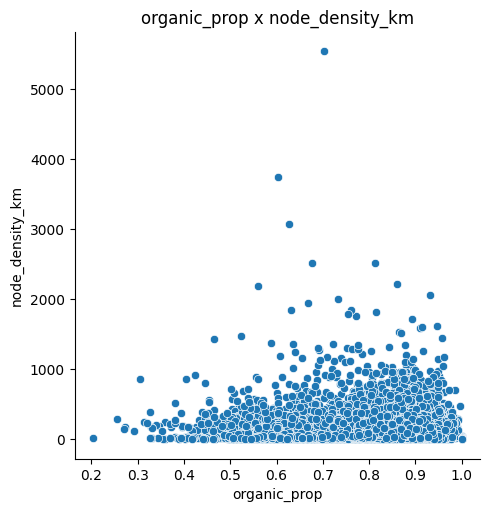

In [27]:
g = sns.relplot(data=final_df, x='organic_prop', y='node_density_km')
g.set(title="organic_prop x node_density_km")

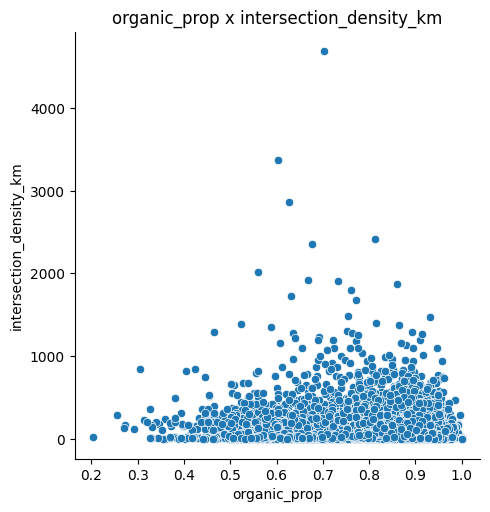

In [28]:
g = sns.relplot(data=final_df, x='organic_prop', y='intersection_density_km')
g.set(title="organic_prop x intersection_density_km")

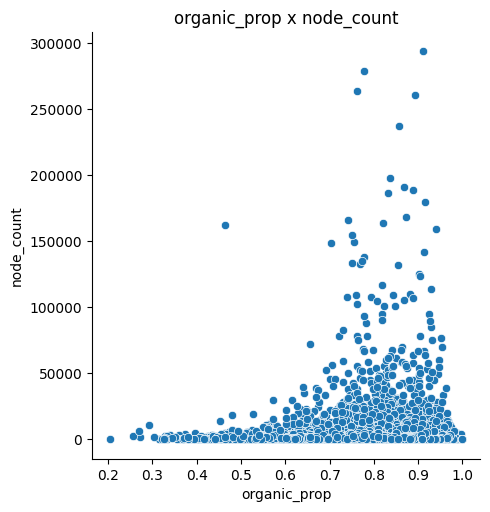

In [29]:
g = sns.relplot(data=final_df, x='organic_prop', y='node_count')
g.set(title="organic_prop x node_count")

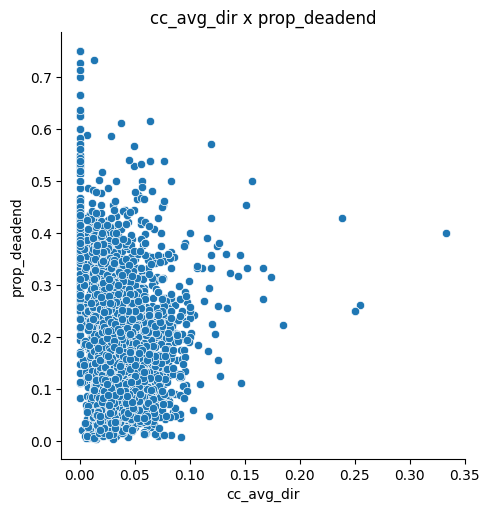

In [30]:
g = sns.relplot(data=final_df, x='cc_avg_dir', y='prop_deadend')
g.set(title="cc_avg_dir x prop_deadend")

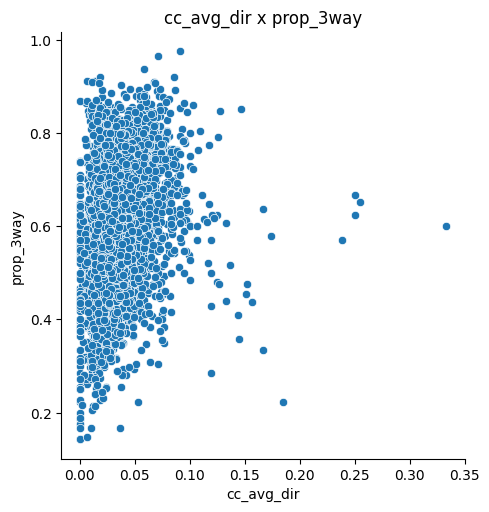

In [31]:
g = sns.relplot(data=final_df, x='cc_avg_dir', y='prop_3way')
g.set(title="cc_avg_dir x prop_3way")

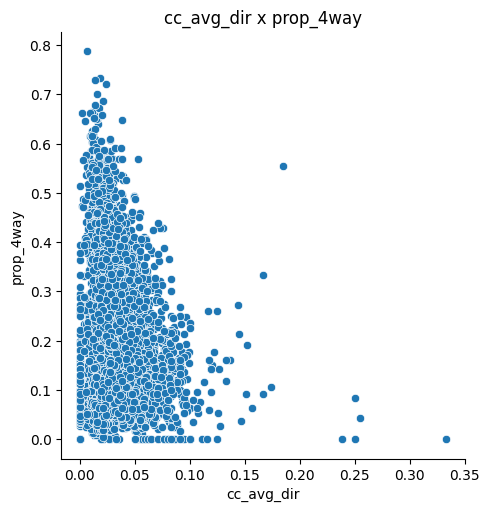

In [32]:
g = sns.relplot(data=final_df, x='cc_avg_dir', y='prop_4way')
g.set(title="cc_avg_dir x prop_4way")

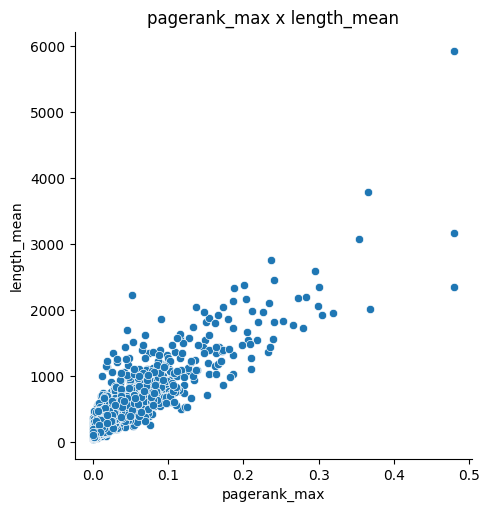

In [33]:
g = sns.relplot(data=final_df, x='pagerank_max', y='length_mean')
g.set(title="pagerank_max x length_mean")

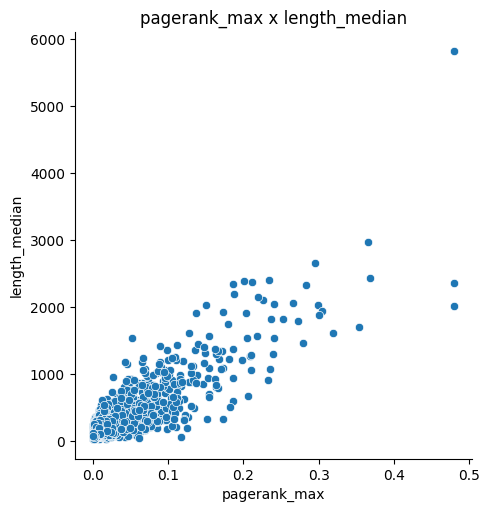

In [34]:
g = sns.relplot(data=final_df, x='pagerank_max', y='length_median')
g.set(title="pagerank_max x length_median")

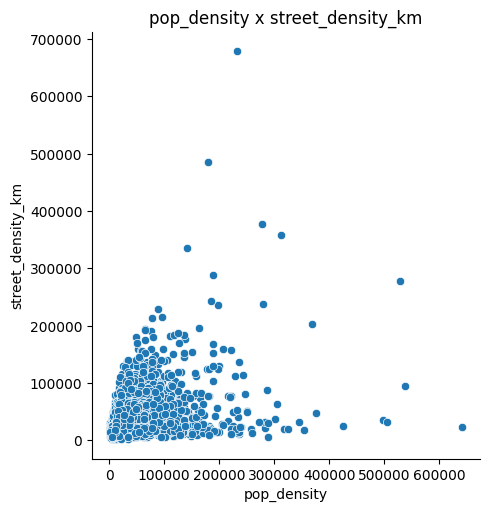

In [35]:
g = sns.relplot(data=final_df, x='pop_density', y='street_density_km')
g.set(title="pop_density x street_density_km")

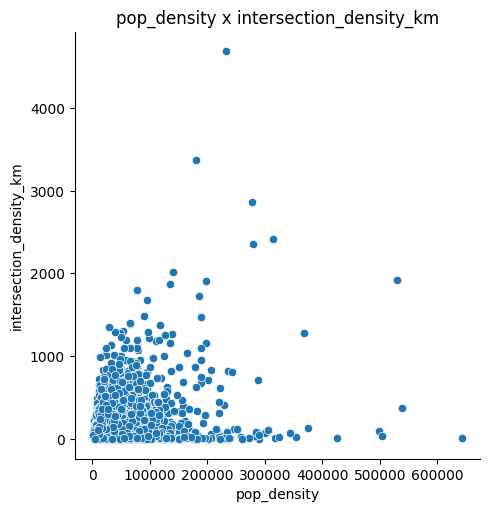

In [36]:
g = sns.relplot(data=final_df, x='pop_density', y='intersection_density_km')
g.set(title="pop_density x intersection_density_km")

## Sobre *organic_prop* e *organic*

In [4]:
final_df['organic'] = final_df['organic_prop'] > 0.5

Text(0.5, 1.0, 'organic_prop dist')

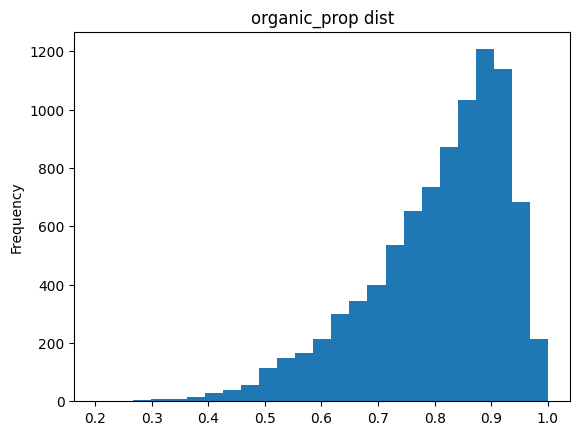

In [38]:
final_df['organic_prop'].plot(kind='hist', bins=25)
plt.title('organic_prop dist')

Existem cidades com proporção orgânica perfeita igual a 1. Isso significa que pode-se esperar que essas cidades possuam somente ruas sem saída ou intersecções em T (cruzamento entre 3 ruas). Isso serve para indicar que essas cidades não são planejadas.

In [39]:
full_organic_cities = final_df[final_df['organic_prop'] == 1]

In [40]:
full_organic_cities[40:][['core_city','uc_id', 'country']]

,core_city,uc_id,country
4265,tanda,7309,india
4431,ahore,6607,india
4447,korutla,8038,india
4676,akabuka,2470,nigeria
4901,laxmangarh,6721,india
4913,ojaima,2490,nigeria
5254,nilanga,7650,india
5259,partapur,6849,india
5631,bholarhat,9577,bangladesh
5793,gumia,9226,india


Por outro lado, existem algumas cidades com baixa proporção orgânica.

In [41]:
low_organic_cities = final_df[final_df['organic'] == False]

In [42]:
len(low_organic_cities)

184

Text(0.5, 1.0, 'Non organic cities per world region')

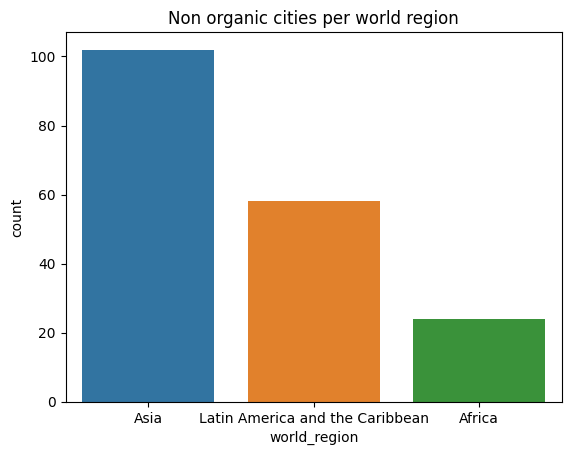

In [43]:
g = sns.countplot(x=final_df[final_df['organic'] == False]["world_region"])
g.set_title("Non organic cities per world region")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Eastern Asia'),
  Text(1, 0, 'South America'),
  Text(2, 0, 'Central America'),
  Text(3, 0, 'Northern Africa'),
  Text(4, 0, 'Western Africa'),
  Text(5, 0, 'Eastern Africa'),
  Text(6, 0, 'Middle Africa'),
  Text(7, 0, 'South-Central Asia'),
  Text(8, 0, 'Western Asia')])

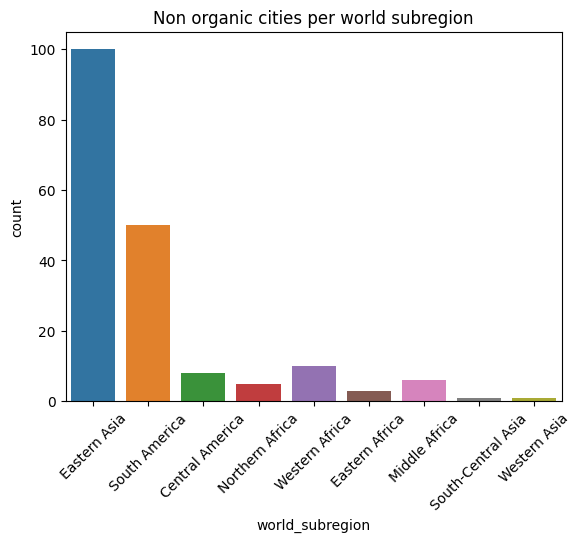

In [44]:
g = sns.countplot(x=final_df[final_df['organic'] == False]["world_subregion"], )
g.set_title("Non organic cities per world subregion")
plt.xticks(rotation=45)

Nenhuma cidade norte americana, europeia e da oceania são consideradas não orgânicas.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Asia'),
  Text(1, 0, 'Latin America and the Caribbean'),
  Text(2, 0, 'Europe'),
  Text(3, 0, 'Africa'),
  Text(4, 0, 'Northern America'),
  Text(5, 0, 'Oceania')])

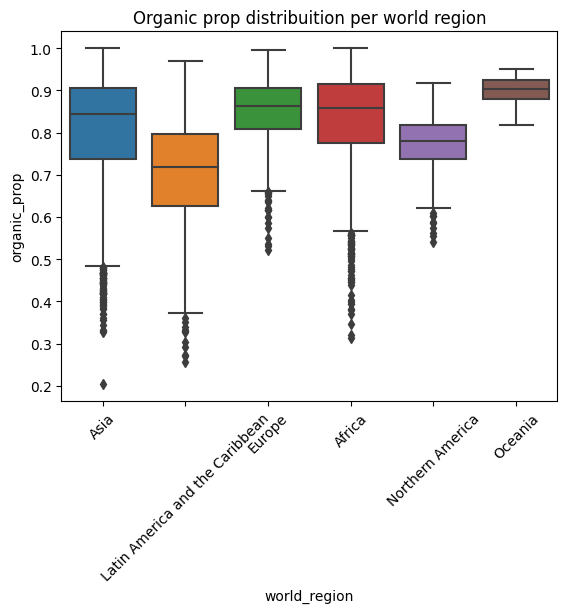

In [45]:
g = sns.boxplot(final_df,x='world_region', y='organic_prop')
g.set_title("Organic prop distribuition per world region")
plt.xticks(rotation=45)

# Sobre densidade de intersecções

In [46]:
final_df.query('intersection_density_km > 2000')[['core_city', 'intersection_density_km', 'country']]

,core_city,intersection_density_km,country
512,riobamba,3370.725111,ecuador
2350,djibouti,2353.416899,djibouti
3307,huancayo,2866.499267,peru
3976,ibarra,2017.723683,ecuador
4041,al_mansurah,2413.536322,yemen
7968,canton_santo_domingo_de_los_tsachilas,4680.600181,ecuador


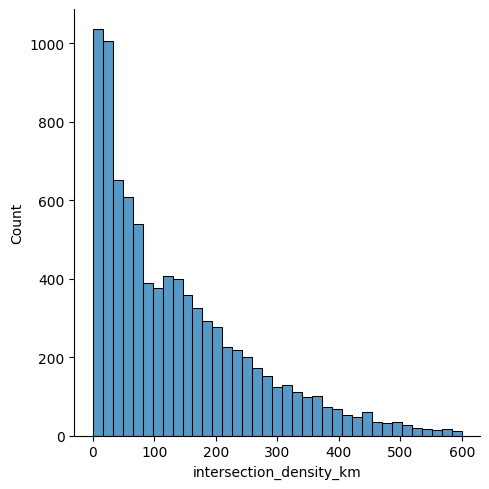

In [47]:
sns.displot(final_df.query('intersection_density_km < 600'), x='intersection_density_km')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Asia'),
  Text(1, 0, 'Latin America and the Caribbean'),
  Text(2, 0, 'Europe'),
  Text(3, 0, 'Africa'),
  Text(4, 0, 'Northern America'),
  Text(5, 0, 'Oceania')])

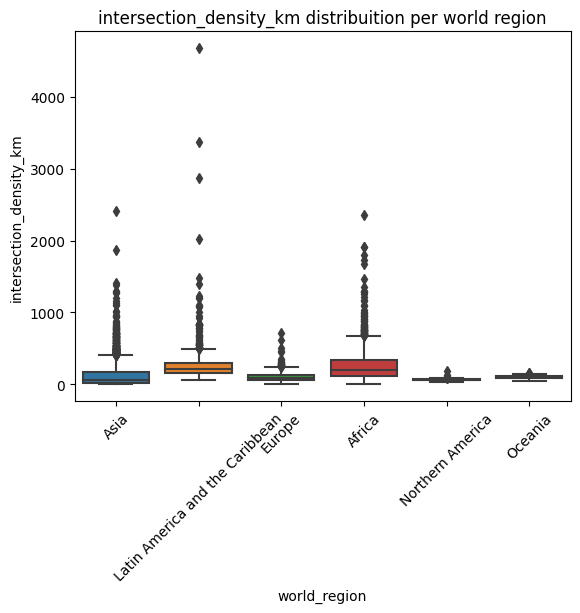

In [48]:
g = sns.boxplot(final_df, x='world_region', y='intersection_density_km')
g.set_title("intersection_density_km distribuition per world region")
plt.xticks(rotation=45)

In [15]:
best_inter_density = final_df[final_df['intersection_density_km'].between(80, 120)]

In [16]:
len(best_inter_density)

963

In [17]:
best_inter_density.query('organic == False')['intersection_density_km']

2672    112.413649
3247     88.466417
4928    114.649518
5950    115.538395
8596    113.885362
Name: intersection_density_km, dtype: float64

In [18]:
organic_best_inter_density = best_inter_density.query('organic == True')

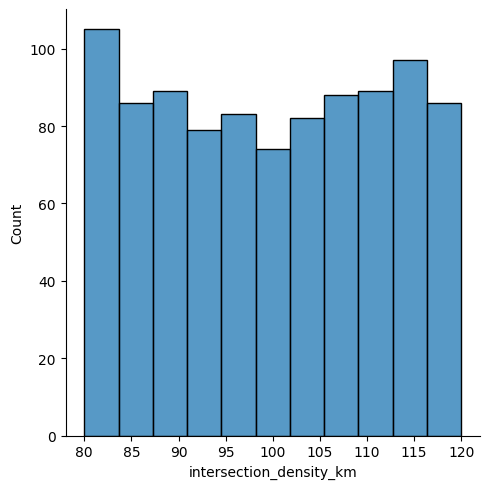

In [19]:
sns.displot(organic_best_inter_density, x='intersection_density_km')

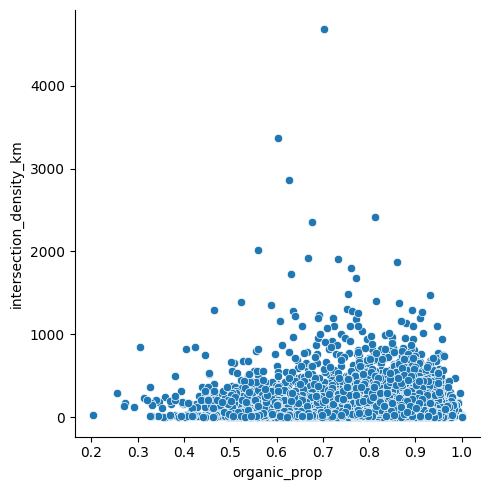

In [54]:
sns.relplot(data=final_df, x='organic_prop', y='intersection_density_km')

## Sobre Densidade Populacional

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Asia'),
  Text(1, 0, 'Latin America and the Caribbean'),
  Text(2, 0, 'Europe'),
  Text(3, 0, 'Africa'),
  Text(4, 0, 'Northern America'),
  Text(5, 0, 'Oceania')])

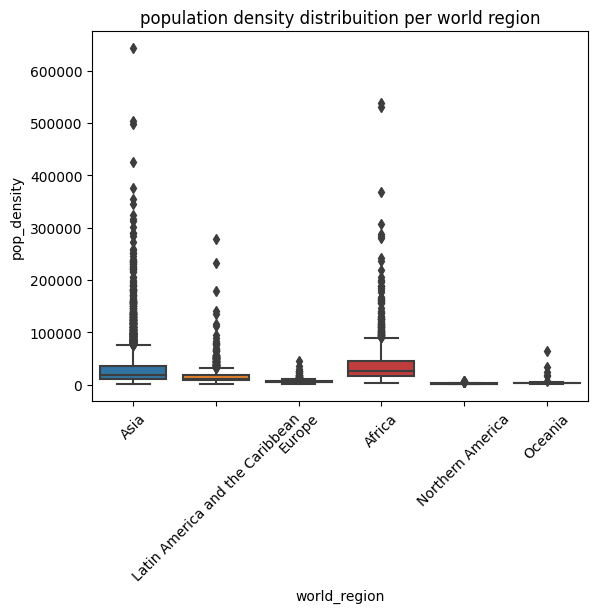

In [55]:
g = sns.boxplot(final_df, x='world_region', y='pop_density')
g.set_title("population density distribuition per world region")
plt.xticks(rotation=45)

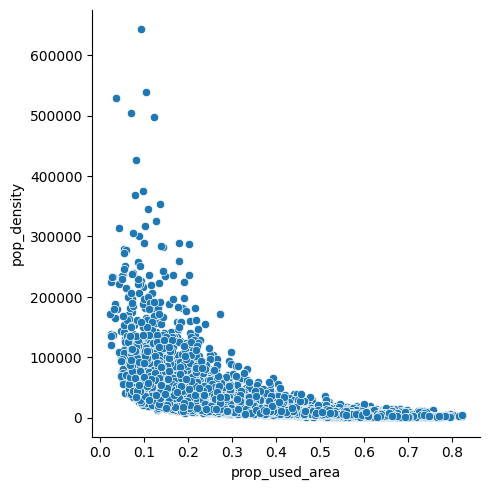

In [56]:
sns.relplot(data=final_df, x='prop_used_area', y='pop_density')

## Cidades com proporção de junção de 3 vias muito altas

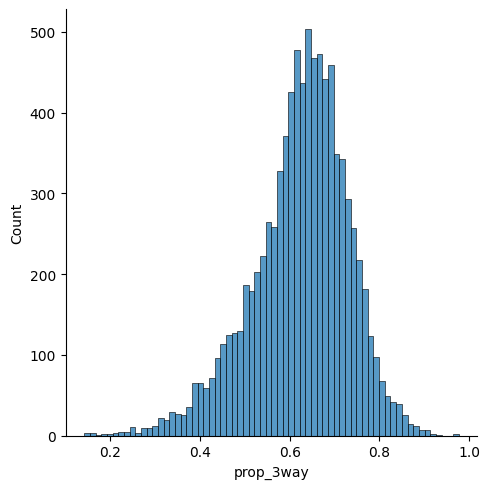

In [57]:
sns.displot(final_df, x='prop_3way')

In [5]:
final_df['3_way_cities'] = final_df['prop_3way'] > 0.85
target_cols = ['country', 'core_city', 'circuity', 'organic_prop', 'prop_3way', 'meshedness_coefficient']

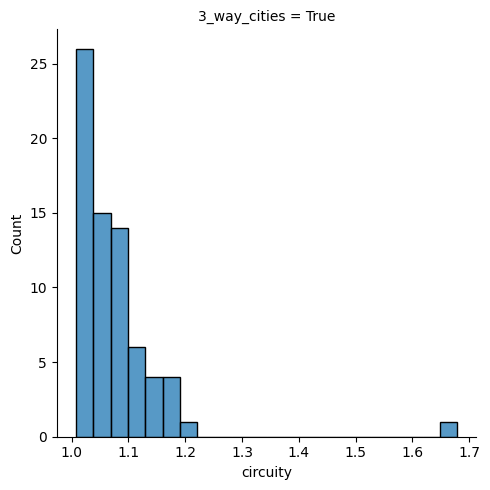

In [59]:
sns.displot(data=final_df[final_df['3_way_cities']], x='circuity', col='3_way_cities')

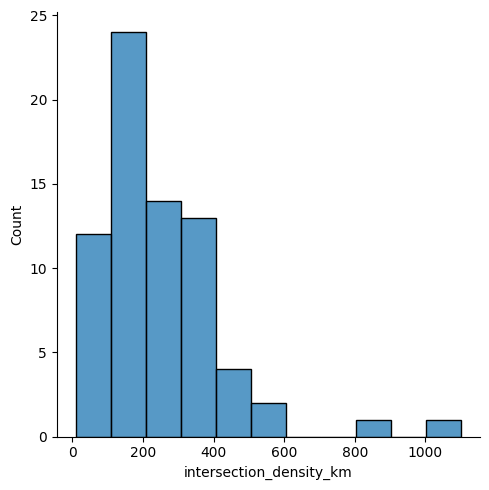

In [60]:
sns.displot(data=final_df[final_df['3_way_cities']], x='intersection_density_km')

### Distribuição de variáveis entre as orgânicas e não orgânicas

Text(0.5, 1.0, 'Non-organic cities per subregion of the world')

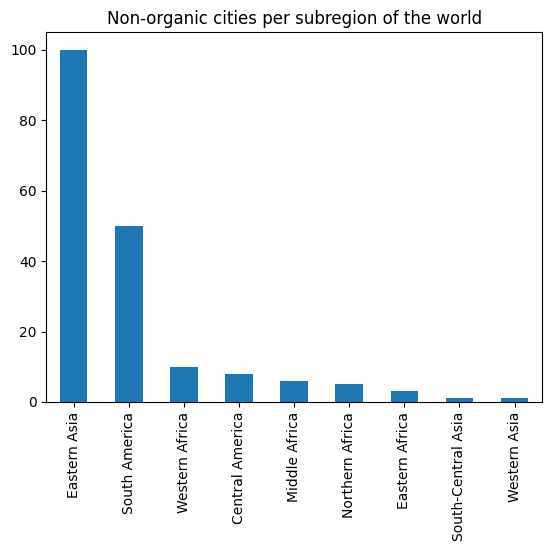

In [61]:
final_df[final_df['organic'] == False]['world_subregion'].value_counts().plot(kind='bar')
plt.title("Non-organic cities per subregion of the world")

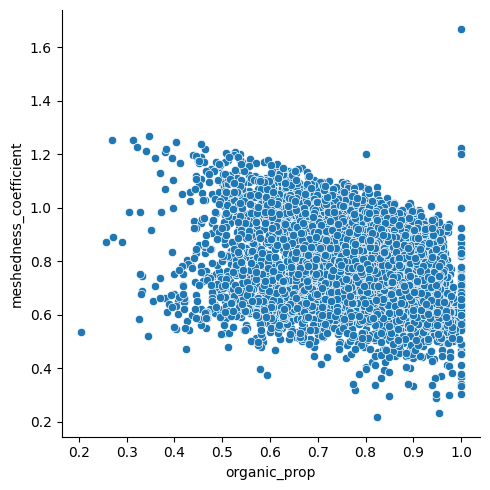

In [62]:
sns.relplot(final_df, x='organic_prop', y='meshedness_coefficient')

In [6]:
def type_one_city(row):
    low_med_organic = row['organic_prop'] < 0.6
    good_mesh = row['meshedness_coefficient'] >= 0.9
    return low_med_organic and good_mesh

final_df['type_one_city'] = final_df.apply(type_one_city, axis=1)

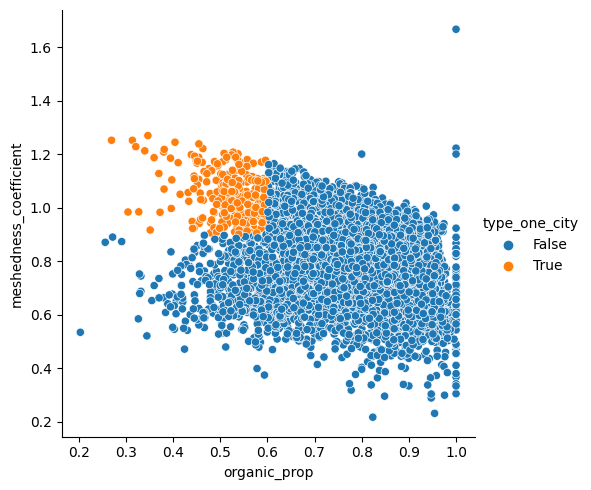

In [64]:
sns.relplot(final_df, x='organic_prop', y='meshedness_coefficient', hue='type_one_city')

In [65]:
filtered_data = final_df[final_df['length_mean'] < 2000]
filtered_data = filtered_data[filtered_data['intersection_density_km'] < 2000]

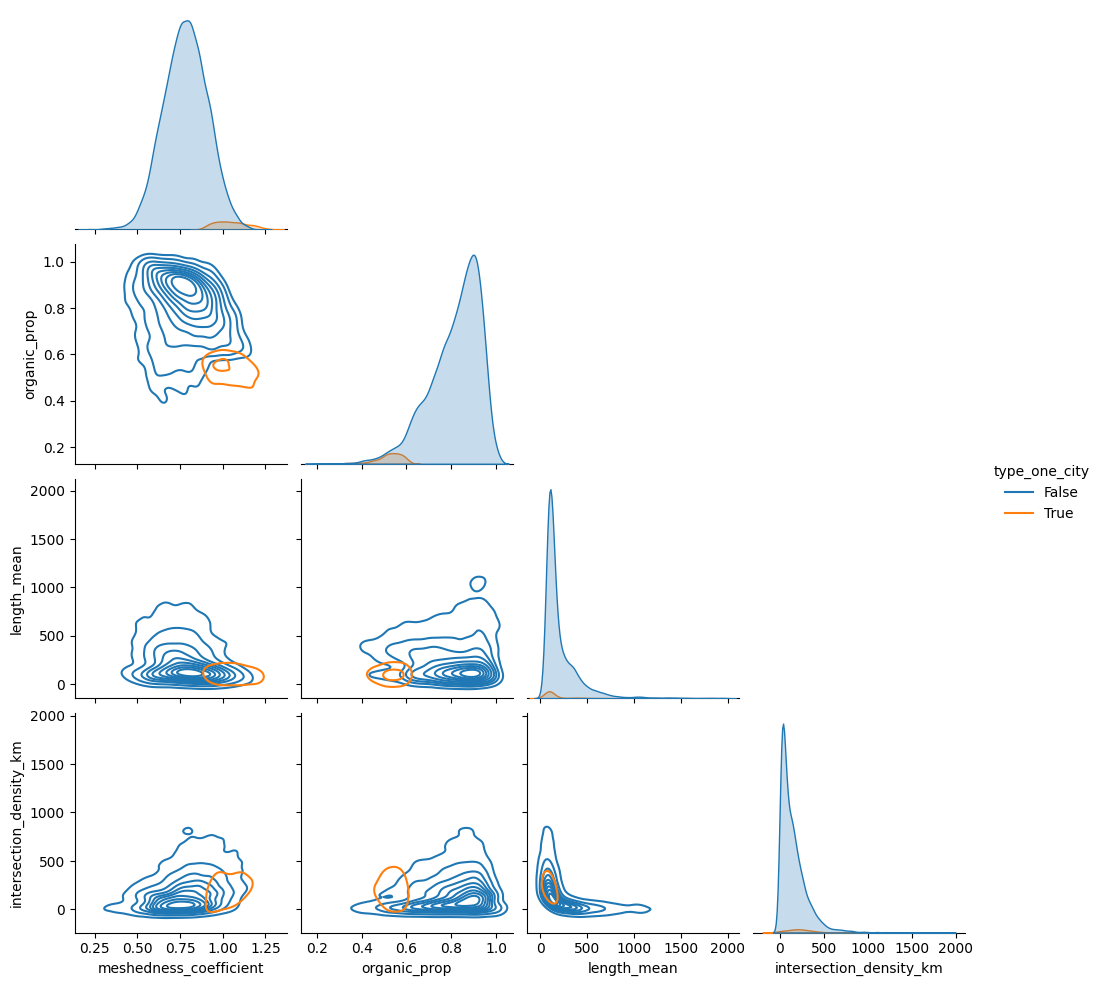

In [66]:
sns.pairplot(filtered_data[['type_one_city', 'meshedness_coefficient', 'organic_prop','length_mean','intersection_density_km']], hue='type_one_city', corner=True, kind='kde')

<AxesSubplot: xlabel='length_median', ylabel='Count'>

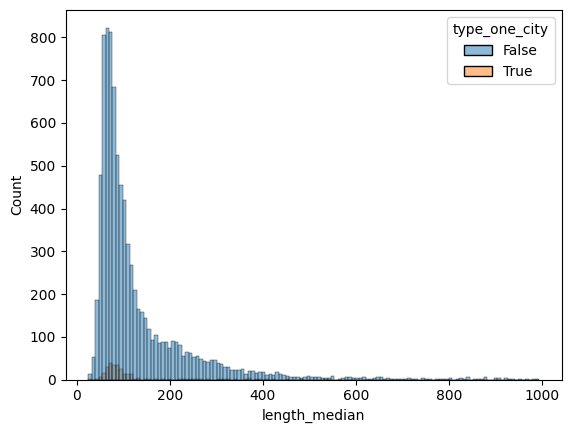

In [67]:
sns.histplot(data=final_df[final_df['length_median'] < 1000], hue="type_one_city", x="length_median")

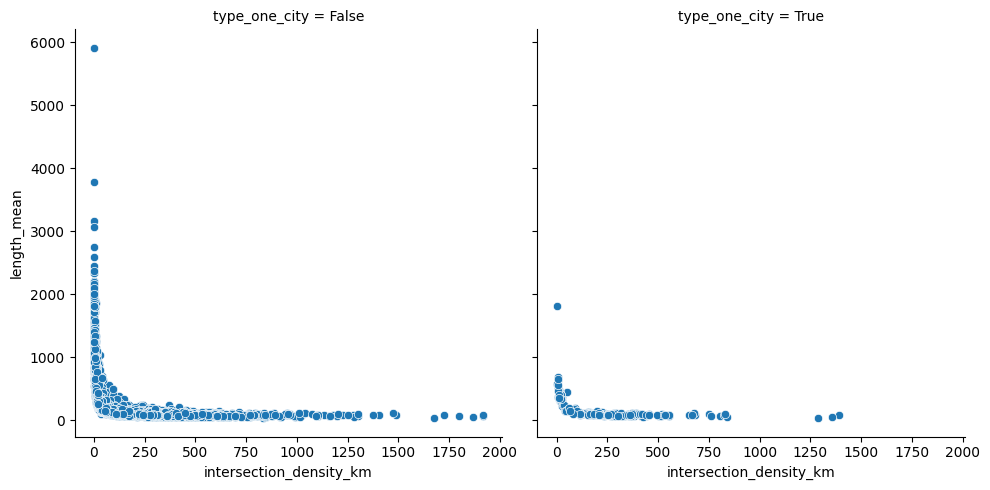

In [68]:
sns.relplot(data=final_df[final_df['intersection_density_km'] < 2000], x='intersection_density_km', y='length_mean', col='type_one_city', col_wrap=2)

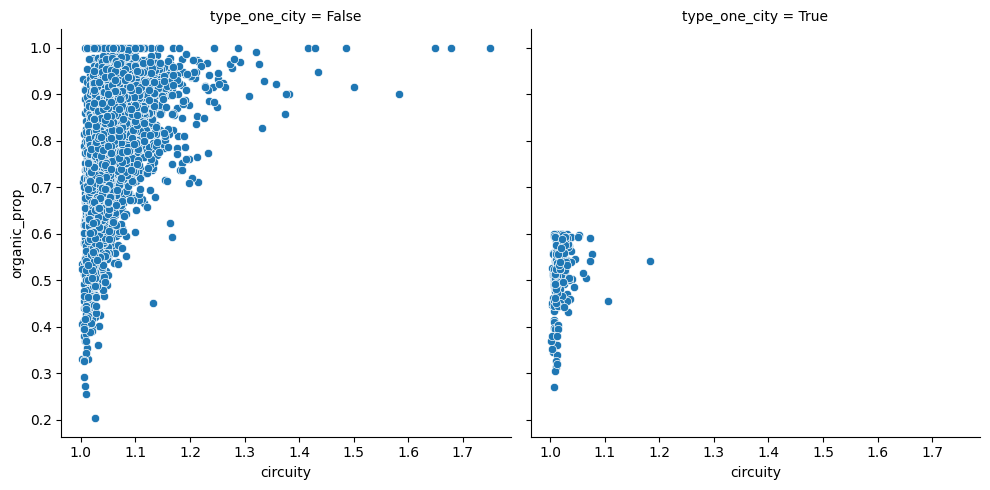

In [69]:
sns.relplot(data=final_df, x='circuity', y='organic_prop', col='type_one_city')

<AxesSubplot: xlabel='circuity', ylabel='Count'>

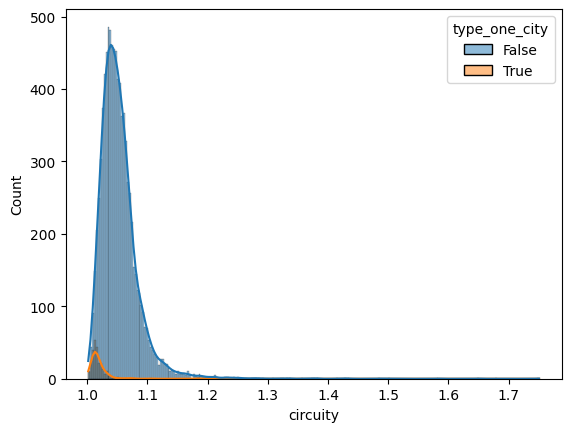

In [70]:
sns.histplot(data=final_df, x='circuity', hue='type_one_city', fill=True, kde=True)

## Testando se cidades tipo um tem menor circuito do que as outras cidades

Hipótese nula: As cidades do tipo um possuem, em média, a mesmo valor de circuito do que as cidades que não são do tipo um.

Hipótese alternativa: As cidades do tipo um possuem, em média, valor significativamente diferente de circuito quando comparado às outras cidades.

Métrica Estatística: Média

In [7]:
import numpy as np

In [8]:
type_one_cities_circuity = final_df[final_df['type_one_city'] == True]['circuity']
not_type_one_cities_circuity = final_df[final_df['type_one_city'] == False]['circuity']

In [73]:
type_one_cities_circuity.mean()

1.0187899093003925

In [74]:
not_type_one_cities_circuity.mean()

1.0537187595773998

In [9]:
def run_permutation_test(pooled,sizeZ,sizeY,delta):
    np.random.shuffle(pooled)
    starZ = pooled[:sizeZ]
    starY = pooled[-sizeY:]
    return starZ.mean() - starY.mean()

def perm_test_mean(treatment, control):
    t_mean = treatment.mean()
    c_mean = control.mean()
    
    delta = t_mean - c_mean
    
    pooled = np.hstack([treatment, control])
    numSamples = 10000
    estimates = np.array(list(map(lambda x: run_permutation_test(pooled,treatment.size,control.size,delta),range(numSamples))))
    
    return estimates, delta

In [76]:
estimates, delta = perm_test_mean(type_one_cities_circuity.values, not_type_one_cities_circuity.values)

In [77]:
delta

-0.03492885027700732

In [10]:
def plot_perm_test_result(estimates, delta, quantile:float, title):
    plt.hist(estimates, bins=30)
    plt.axvline(delta, color='red', label=f"Delta: {delta}")
    quantile_value = np.quantile(estimates, quantile)
    plt.axvline(quantile_value, color='black', label=f"{quantile*100}% quantile")
    plt.title(title)
    plt.legend()
    plt.show()

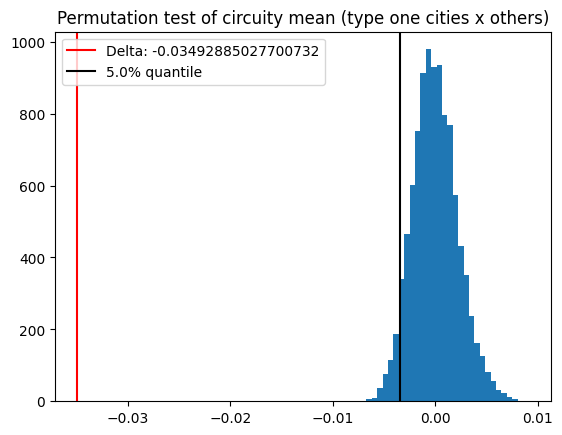

In [79]:
plot_perm_test_result(estimates, delta, 0.05, "Permutation test of circuity mean (type one cities x others)")

Logo, é possível ver que, claramente, a média da diferença entre as cidades que são do tipo um e aquelas que não são será muito dificilmente replicada utilizando de uma distribuição aleatória.

<AxesSubplot: xlabel='circuity', ylabel='meshedness_coefficient'>

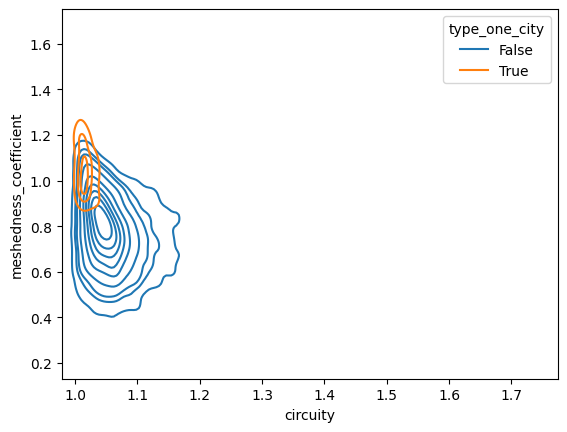

In [80]:
sns.kdeplot(data=final_df, x='circuity', y='meshedness_coefficient', hue='type_one_city')

<AxesSubplot: xlabel='circuity', ylabel='organic_prop'>

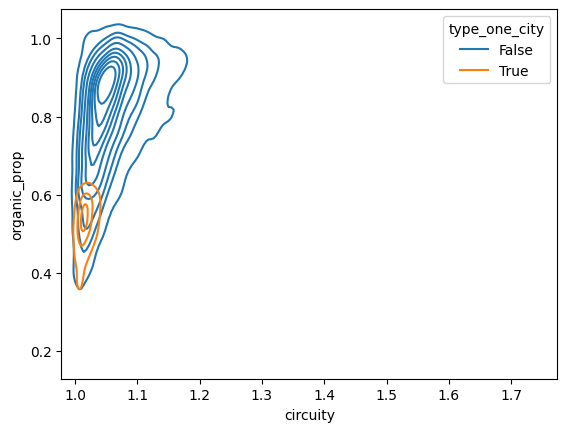

In [81]:
sns.kdeplot(data=final_df, x='circuity', y='organic_prop', hue='type_one_city')

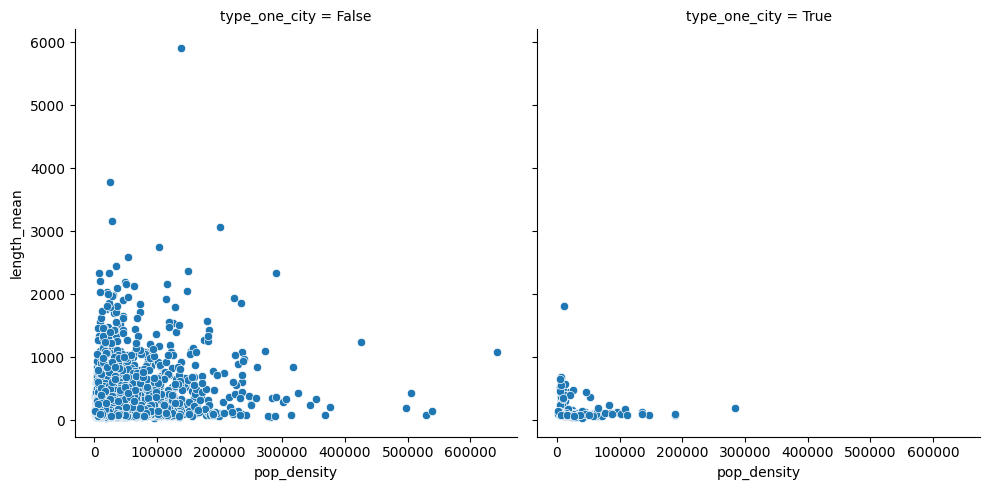

In [82]:
sns.relplot(data=final_df, x='pop_density', y='length_mean', col='type_one_city')

<AxesSubplot: xlabel='intersection_density_km', ylabel='Count'>

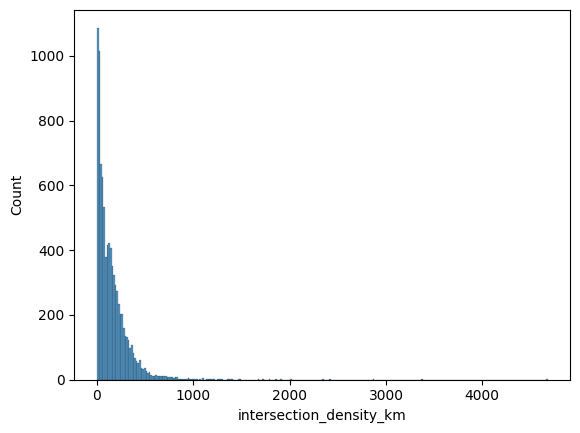

In [83]:
sns.histplot(data=final_df, x='intersection_density_km')

In [11]:
def type_two_city(row):
    low_med_organic = row['organic_prop'] < 0.65
    good_mesh = row['meshedness_coefficient'] >= 0.75
    good_intersec_density = row['intersection_density_km'] >= 80 and row['intersection_density_km'] <= 120
    not_type_one = not row['type_one_city']
    return all([low_med_organic, good_mesh, good_intersec_density, not_type_one])

final_df['type_two_city'] = final_df.apply(type_two_city, axis=1)

In [85]:
final_df[final_df['type_two_city'] == True][['country', 'core_city', 'uc_id', 'resident_pop']]

,country,core_city,uc_id,resident_pop
173,kazakhstan,zhanaozen,5649,109849
817,united_states,richmond,828,244212
1169,ukraine,lozova,3835,64288
1430,united_states,spokane,241,265825
2672,argentina,la_plata,1117,691901
3947,united_states,atlantic_city,918,65800
4108,china,hanggin,10179,52920
4249,myanmar,aunglan,10162,123157
4425,nigeria,kamba,2174,95782
4577,myanmar,nyaung_shwe,10226,70405


In [12]:
def city_type(row):
    
    if row['type_one_city']:
        return 1
    elif row['type_two_city']:
        return 2
    elif row['3_way_cities'] and row['circuity'] < 1.05:
        return 3
    else:
        return 4
    
final_df['city_type'] = final_df.apply(city_type, axis=1)

In [10]:
final_df['city_type'].value_counts()

4    8596
1     265
3      31
2      17
Name: city_type, dtype: int64

<AxesSubplot: xlabel='city_type', ylabel='circuity'>

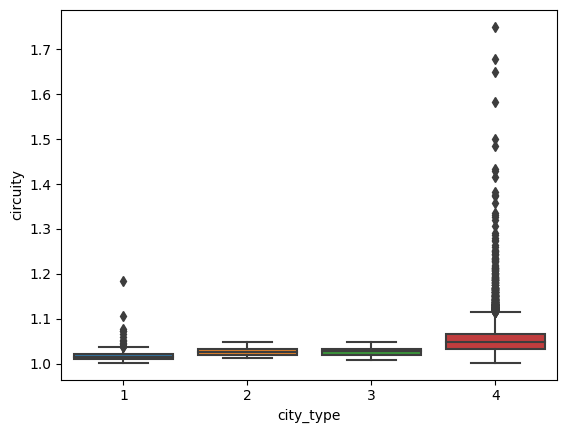

In [88]:
sns.boxplot(data=final_df, x='city_type', y='circuity')

<AxesSubplot: xlabel='city_type', ylabel='organic_prop'>

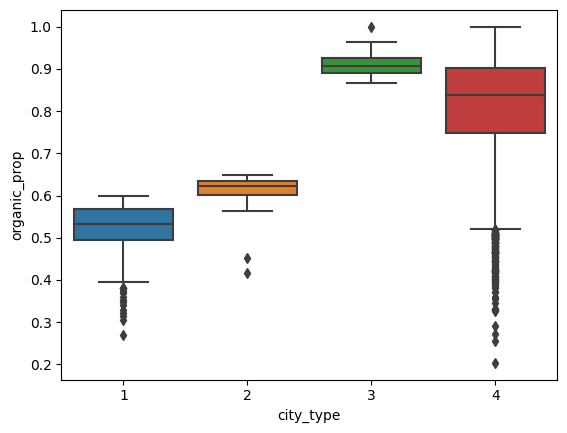

In [89]:
sns.boxplot(data=final_df, x='city_type', y='organic_prop')

Já era esperado que cidades do tipo 3 tivessem alto *organic_prop* pois eles tem um alto valor de *prop_3way*

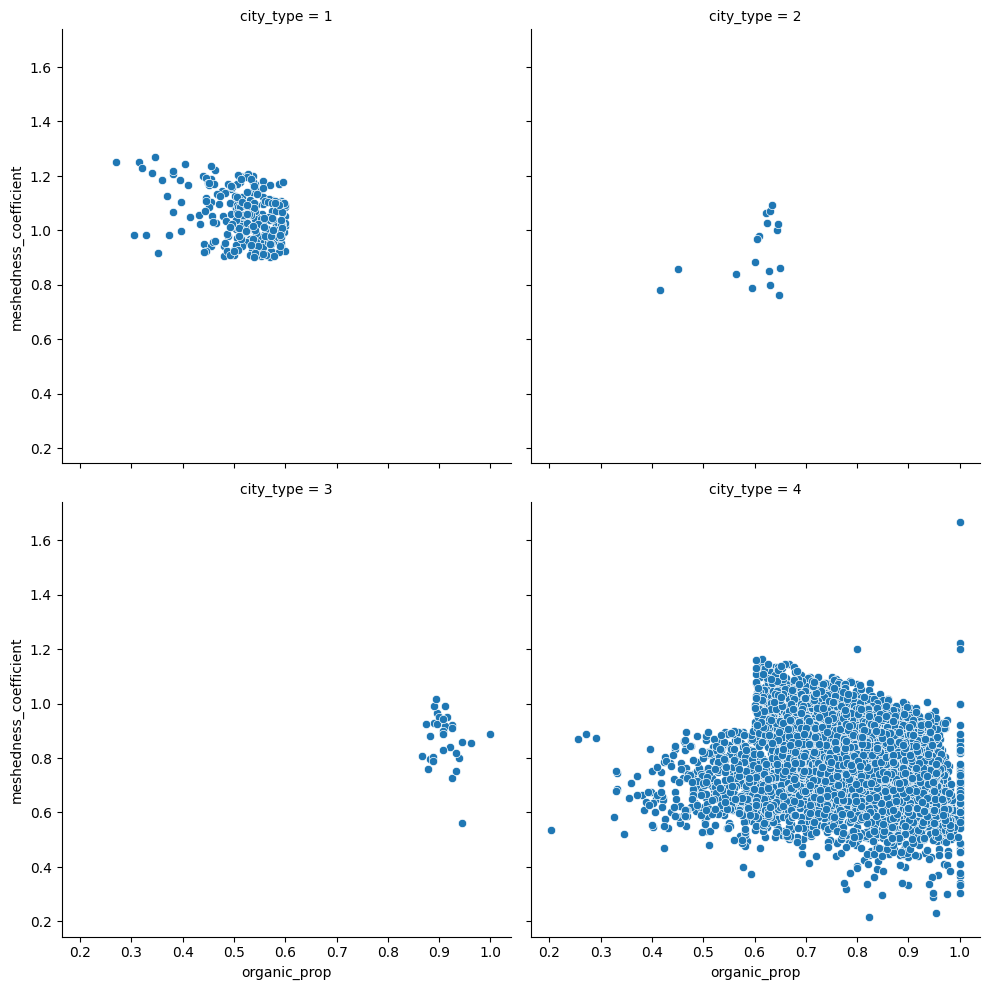

In [90]:
sns.relplot(final_df, x='organic_prop', y='meshedness_coefficient', col='city_type', col_wrap = 2)

In [13]:
final_df['chosen'] = final_df['city_type'] != 4 

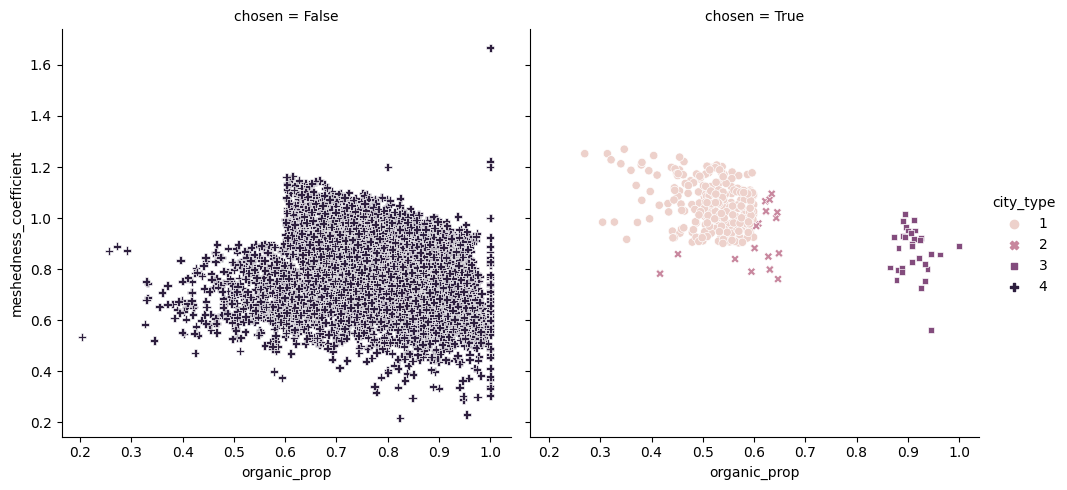

In [14]:
sns.relplot(data=final_df, x='organic_prop', y='meshedness_coefficient', col='chosen', hue='city_type', style='city_type')

<AxesSubplot: xlabel='circuity', ylabel='Count'>

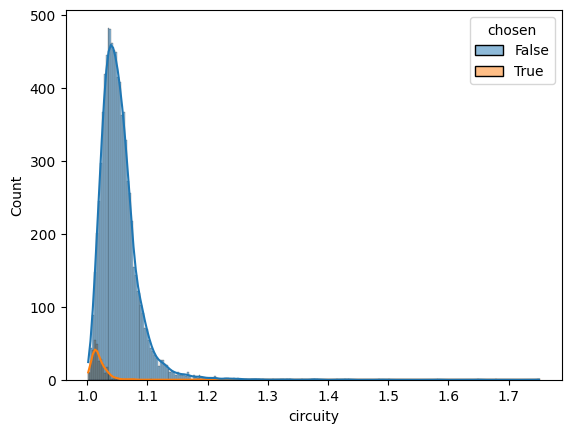

In [93]:
sns.histplot(data=final_df, x='circuity', hue='chosen', kde=True)

<AxesSubplot: xlabel='organic_prop', ylabel='Count'>

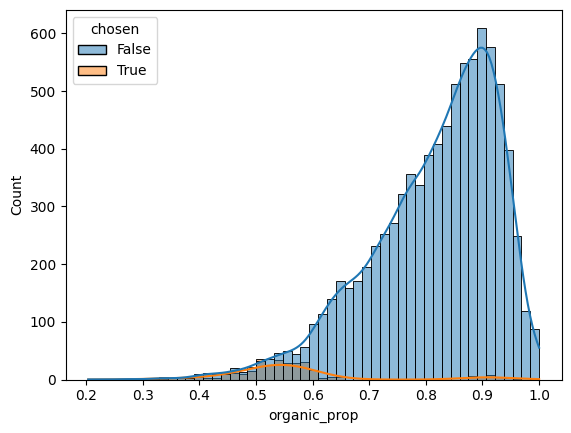

In [94]:
sns.histplot(data=final_df, x='organic_prop', hue='chosen', kde=True)

<AxesSubplot: xlabel='meshedness_coefficient', ylabel='Count'>

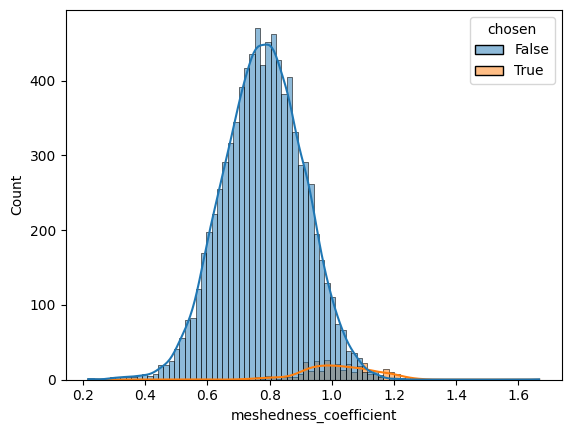

In [95]:
sns.histplot(data=final_df, x='meshedness_coefficient', hue='chosen', kde=True)

<AxesSubplot: xlabel='cc_avg_undir', ylabel='Count'>

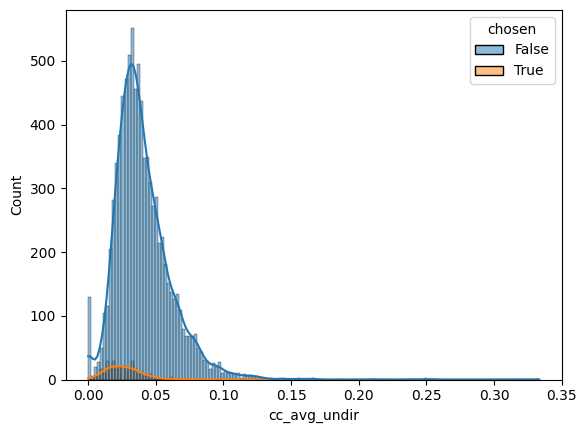

In [96]:
sns.histplot(data=final_df, x='cc_avg_undir', hue='chosen', kde=True)

Hipótese nula: As cidades do tipo 2 possuem, em média, valor de circuito diferente das cidades tipo 1

Hipótese alternativa: As cidades do tipo 2 não possuem, em média, valor de circuito significataviamente diferente das cidades tipo 1

Métrica estatística: Média

In [97]:
type_one_cities = final_df[final_df['city_type'] == 1]
type_two_cities = final_df[final_df['city_type'] == 2]

In [98]:
estimates, delta = perm_test_mean(type_one_cities['circuity'].values, type_two_cities['circuity'].values)

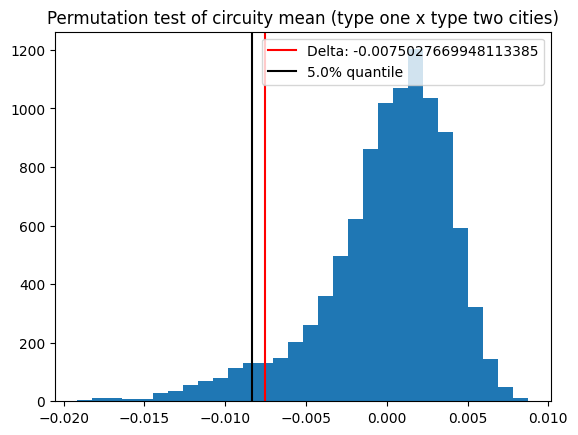

In [99]:
plot_perm_test_result(estimates, delta, 0.05, "Permutation test of circuity mean (type one x type two cities)")

Assim, a hipótese nula é rejeitada.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Latin America and the Caribbean'),
  Text(1, 0, 'Africa'),
  Text(2, 0, 'Asia'),
  Text(3, 0, 'Europe'),
  Text(4, 0, 'Northern America')])

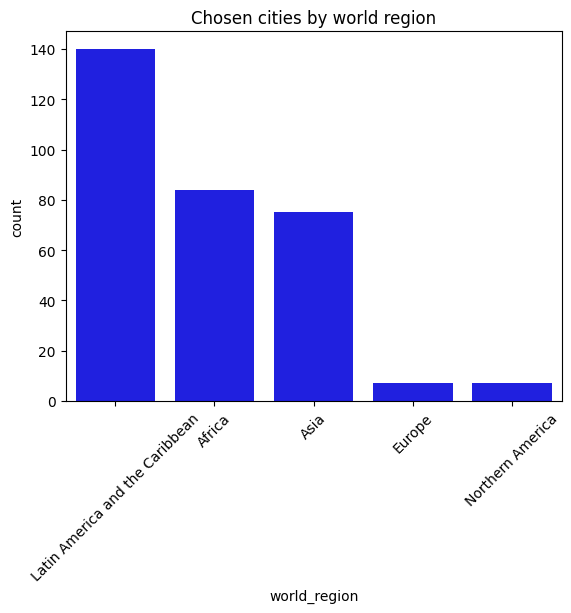

In [100]:
plot_order = ['Latin America and the Caribbean', 'Africa', 'Asia', 'Europe', 'Northern America']
g = sns.countplot(data=final_df[final_df['chosen']], x='world_region', order=plot_order, color='blue')
g.set(title='Chosen cities by world region')
plt.xticks(rotation=45)

In [20]:
chosen = final_df[final_df['chosen']]

In [24]:
chosen.groupby(by=['world_region','city_type']).describe()

uc_id                             \
                                           count          mean          std   
world_region                    city_type                                     
Africa                          1           73.0   3153.164384  1137.540708   
                                2            3.0   2932.000000   733.383938   
                                3            8.0   3031.625000   671.129099   
Asia                            1           49.0  10245.285714  1903.460708   
                                2            5.0   9271.200000  2025.118194   
                                3           21.0   5506.904762   345.603661   
Europe                          1            6.0   4507.166667   430.902967   
                                2            1.0   3835.000000          NaN   
Latin America and the Caribbean 1          133.0    812.315789   406.938689   
                                2            5.0    885.600000   320.568713   
                                3            2.0   1221.000000    14.142136   
Northern America                1            4.0    352.750000   210.414472   
                                2            3.0    662.333333   367.649743   

                                                                      \
                                              min       25%      50%   
world_region                    city_type                              
Africa                          1          1460.0   2120.00   3319.0   
                                2          2174.0   2579.00   2984.0   
                                3          2190.0   2800.50   2846.0   
Asia                            1          4508.0  10141.00  10730.0   
                                2          5649.0  10140.00  10162.0   
                                3          4937.0   5345.00   5449.0   
Europe                          1          4031.0   4214.50   4461.0   
                                2          3835.0   3835.00   3835.0   
Latin America and the Caribbean 1            59.0    444.00   1008.0   
                                2           473.0    604.00   1096.0   
                                3          1211.0   1216.00   1221.0   
Northern America                1           235.0    244.75    254.0   
                                2           241.0    534.50    828.0   

                                                             cc_avg_dir  \
                                                75%      max      count   
world_region                    city_type                                 
Africa                          1           4069.00   5827.0       73.0   
                                2           3311.00   3638.0        3.0   
                                3           3045.50   4403.0        8.0   
Asia                            1          11338.00  12756.0       49.0   
                                2          10179.00  10226.0        5.0   
                                3           5563.00   6607.0       21.0   
Europe                          1           4682.75   5201.0        6.0   
                                2           3835.00   3835.0        1.0   
Latin America and the Caribbean 1           1135.00   1425.0      133.0   
                                2           1117.00   1138.0        5.0   
                                3           1226.00   1231.0        2.0   
Northern America                1            362.00    668.0        4.0   
                                2            873.00    918.0        3.0   

                                                     ...   pop_density  \
                                               mean  ...           75%   
world_region                    city_type            ...                 
Africa                          1          0.019099  ...  65053.766976   
                                2          0.033150  ...  65722.031691   
                                3          0.064678  .

In [26]:
african_cities = final_df[final_df['world_region'] == 'Africa']
african_cities[african_cities['organic_prop'] < 0.6]

,country,country_iso,core_city,uc_id,cc_avg_dir,cc_avg_undir,cc_wt_avg_dir,cc_wt_avg_undir,circuity,elev_iqr,...,28way_int_prop,pop_density,prop_used_area,big,organic,3_way_cities,type_one_city,type_two_city,city_type,chosen
642,guinea,GIN,kankan,1539,0.038175,0.046926,0.002422,0.002577,1.018741,9.0,...,NaN,19049.917149,0.486688,False,True,False,True,False,1,True
769,democratic_republic_of_the_congo,COD,lukalaba,3544,0.016958,0.016958,0.000665,0.000665,1.011700,18.0,...,NaN,57693.091034,0.160370,False,True,False,True,False,1,True
844,guinea,GIN,siguiri,1540,0.020596,0.022108,0.001338,0.001369,1.013434,14.5,...,NaN,31118.817374,0.336994,False,True,False,True,False,1,True
935,nigeria,NGA,djibia,2540,0.014515,0.014515,0.000749,0.000749,1.012509,8.0,...,NaN,20727.331368,0.449813,False,True,False,True,False,1,True
952,senegal,SEN,diourbel,1465,0.012461,0.012461,0.000664,0.000664,1.011529,11.0,...,NaN,27171.493305,0.440550,False,True,False,True,False,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8386,niger,NER,magaria,2768,0.010925,0.010925,0.000695,0.000695,1.002935,1.0,...,NaN,76222.387201,0.217751,False,False,False,True,False,1,True
8528,senegal,SEN,darou_mousti,1470,0.015226,0.015226,0.001371,0.001371,1.010664,3.0,...,NaN,15063.753468,0.437540,False,False,False,True,False,1,True
8555,cameroon,CMR,banki,3129,0.033236,0.035352,0.001363,0.001387,1.023945,3.0,...,NaN,87697.073034,0.264571,False,True,False,True,False,1,True
8840,senegal,SEN,bambey,1460,0.018361,0.018721,0.001283,0.001298,1.016884,3.0,...,NaN,51827.117975,0.291513,False,True,False,True,False,1,True


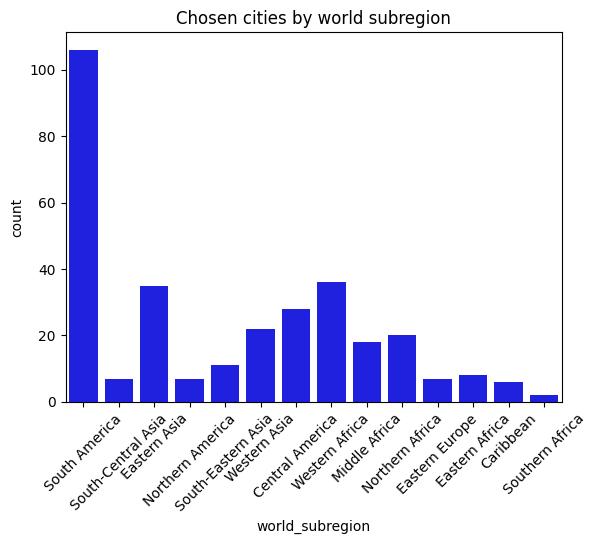

In [101]:
g = sns.countplot(data=final_df[final_df['chosen']], x='world_subregion', color='blue')
g.set(title='Chosen cities by world subregion')
plt.xticks(rotation=45)
plt.show()

In [102]:
chosen_cities = final_df[final_df['chosen']]

In [103]:
len(chosen_cities)

313

In [104]:
chosen_cities_path = pathlib.Path('./data/chosen_cities.csv')
chosen_cities.to_csv(chosen_cities_path, index=False)